# Performance Enhancing Drugs Role in Home Run Hits

In [131]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import time
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

In [139]:
df = pd.read_csv('/Users/ezzan/Documents/total-construction-spending.csv')
df.dtypes
df['date'] =  pd.to_datetime(df['date'],
                              format='%Y-%m-%d')
print(construction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
realtime_start    310 non-null object
realtime_end      310 non-null object
date              310 non-null datetime64[ns]
value             310 non-null int64
diff              309 non-null timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(2), timedelta64[ns](1)
memory usage: 9.7+ KB
None


In [140]:
df.dtypes

realtime_start            object
realtime_end              object
date              datetime64[ns]
value                      int64
dtype: object

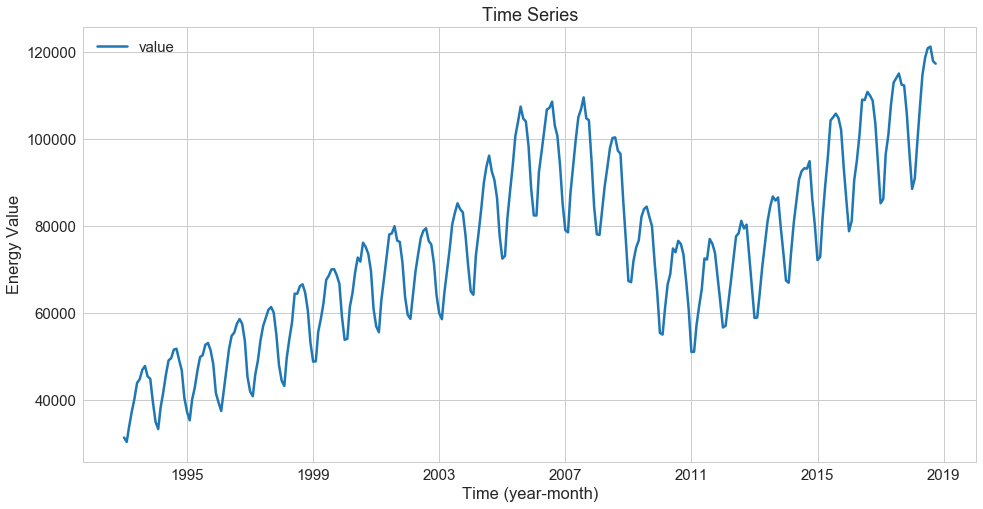

In [175]:
df['date'] = pd.to_datetime(df.date, format = '%d-%m-%Y')
df.index = df['date']
ts = df['value']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Energy Value")
plt.legend(loc = 'best')

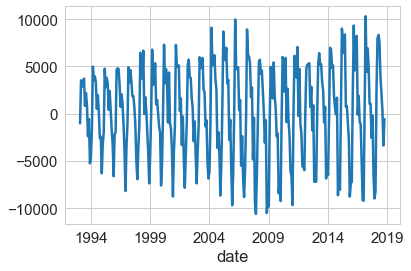

In [177]:
df['diff_1'] = df['value'] - df['value'].shift(periods=1)
df.diff_1.plot(y='diff_1')
plt.show()

In [193]:
from statsmodels.tsa.stattools import adfuller

x = df['value']
result = adfuller(x)
print('Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])



Data:
ADF Statistic -1.347815
p-value: 0.607023


In [194]:
# differenced data
x_diff = df['diff_1'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])


Differenced Data:
ADF Statistic -2.352496
p-value: 0.155595


In [195]:
import statsmodels
from statsmodels.tsa.stattools import pacf, acf

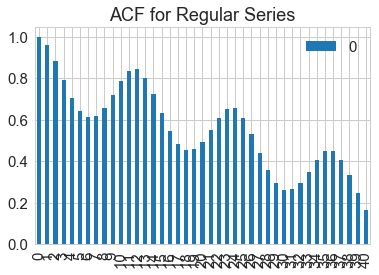

In [196]:
x_acf = pd.DataFrame(acf(x))
x_acf.plot(kind='bar')
plt.title('ACF for Regular Series')
plt.show()

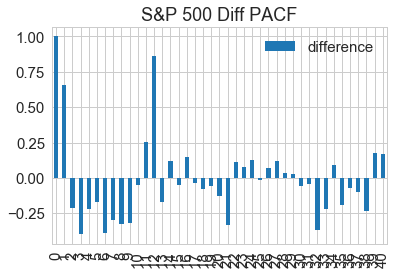

In [197]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

In [185]:
from statsmodels.tsa.arima_model import ARIMA

model_110 = ARIMA(df['value'], order=(1,1,0))
model_110_fit = model_110.fit()
print(model_110_fit.summary())
print('Residuals Description')
print(model_110_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  309
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2973.149
Method:                       css-mle   S.D. of innovations           3648.285
Date:                Tue, 08 Jan 2019   AIC                           5952.298
Time:                        22:20:19   BIC                           5963.498
Sample:                    02-01-1993   HQIC                          5956.776
                         - 10-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           278.4790    590.342      0.472      0.637    -878.570    1435.528
ar.L1.D.value     0.6505      0.043     15.148      0.000       0.566       0.735
                                    Root

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


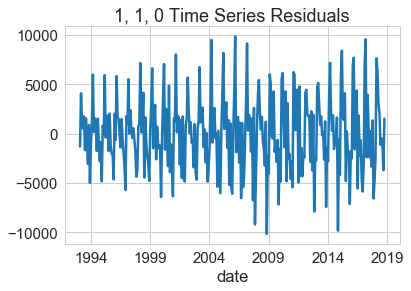

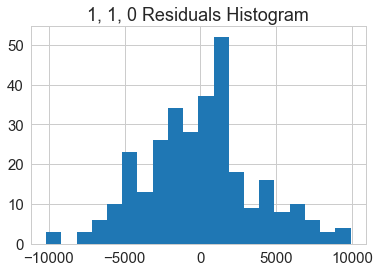

In [186]:
residuals_110 = pd.DataFrame(model_110_fit.resid)
residuals_110.plot(legend=False)
plt.title('1, 1, 0 Time Series Residuals')

residuals_110.hist(bins=20)
plt.title('1, 1, 0 Residuals Histogram')

plt.show()

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  309
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2822.987
Method:                       css-mle   S.D. of innovations           2193.539
Date:                Wed, 09 Jan 2019   AIC                           5669.974
Time:                        13:57:58   BIC                           5714.774
Sample:                    02-01-1993   HQIC                          5687.885
                         - 10-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           242.1482    103.678      2.336      0.020      38.944     445.353
ar.L1.D.value     0.7151      0.031     23.041      0.000       0.654       0.776
ar.L2.D.value    -0.1259      0.040     

NameError: name 'residuals_313' is not defined

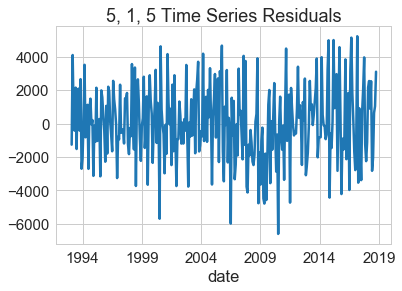

In [199]:
model_515 = ARIMA(df['value'], order=(5,1,5))
model_515_fit = model_515.fit()
print(model_515_fit.summary())
print('Residuals Description')
print(model_515_fit.resid.describe())

residuals_515 = pd.DataFrame(model_515_fit.resid)
residuals_515.plot(legend=False)
plt.title('5, 1, 5 Time Series Residuals')

residuals_313.hist(bins=20)
plt.title('5, 1, 5 Residuals Histogram')

plt.show()

In [201]:

model_12112 = ARIMA(df['value'], order=(12,1,12))
model_12112_fit = model_12112.fit()
print(model_12112_fit.summary())
print('Residuals Description')
print(model_12112_fit.resid.describe())

residuals_12112 = pd.DataFrame(model_12112_fit.resid)
residuals_12112.plot(legend=False)
plt.title('6, 1, 6 Time Series Residuals')

residuals_12112.hist(bins=20)
plt.title('6, 1, 6 Residuals Histogram')

plt.show()

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.